<a href="https://colab.research.google.com/github/micaelakorol21/water_quality_unsupervised_learning/blob/main/water_quality_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<h1>Clasificación de Agua Potable</h1>
<h2>🚰El objetivo de este proyecto es predecir si una muestra de agua es potable basándonos en características físico-químicas y ambientales.</h2>

In [108]:
df = pd.read_csv('https://media.githubusercontent.com/media/micaelakorol21/dataset_water_quality/refs/heads/main/Water_quality.csv')

<p style="font-size:20px;">🔍Exploración de los datos:</p>

In [109]:
df.shape
# El dataset poseé: 24 columnas y 698.575 filas.

(698575, 24)

In [110]:
# Observamos los tipos de datos de cada columna:
df.dtypes

,0
Index,int64
pH,float64
Iron,float64
Nitrate,float64
Chloride,float64
Lead,float64
Zinc,float64
Color,object
Turbidity,float64
Fluoride,float64


In [111]:
# Observamos las columnas que tienen datos faltantes:
df.isna().sum()

,0
Index,0
pH,13438
Iron,4684
Nitrate,12430
Chloride,20467
Lead,3107
Zinc,18498
Color,660
Turbidity,5798
Fluoride,21996


In [112]:
# Calculamos el maximo valor faltante:
max_missing = df.isna().sum().max()
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 23291


<b style='font-size:22px'>Renombramos las columnas</b>

In [113]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})

<b style="font-size:16px">El conjunto de datos incluye 24 columnas, de las cuales 23 son variables predictoras y 1 es la variable objetivo que indica si el agua <b style='color:red'> es potable (1) o no (0)  </b> .</b>

In [114]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')

<b style="font-size:22px;"> Análisis de la variable objetivo: Objetivo</b>

In [115]:
# Conteo de clases
df['Objetivo'].value_counts()

,count
Objetivo,
0,457841
1,240734


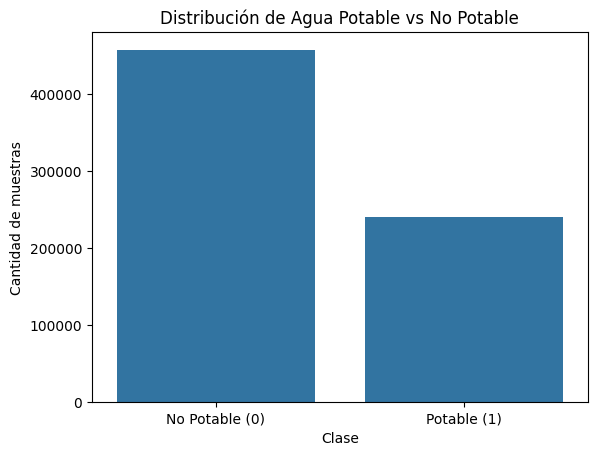

In [116]:
sns.countplot(data=df, x='Objetivo')
plt.title('Distribución de Agua Potable vs No Potable')
plt.xticks([0, 1], ['No Potable (0)', 'Potable (1)'])
plt.ylabel('Cantidad de muestras')
plt.xlabel('Clase')
plt.show()

<b style='font-size:16px'>El dataset está desbalanceado: hay más muestras de agua no potable (457841) que de agua potable (240734).</b>

<b style="font-size:22px">Análisis de la columna pH </b>

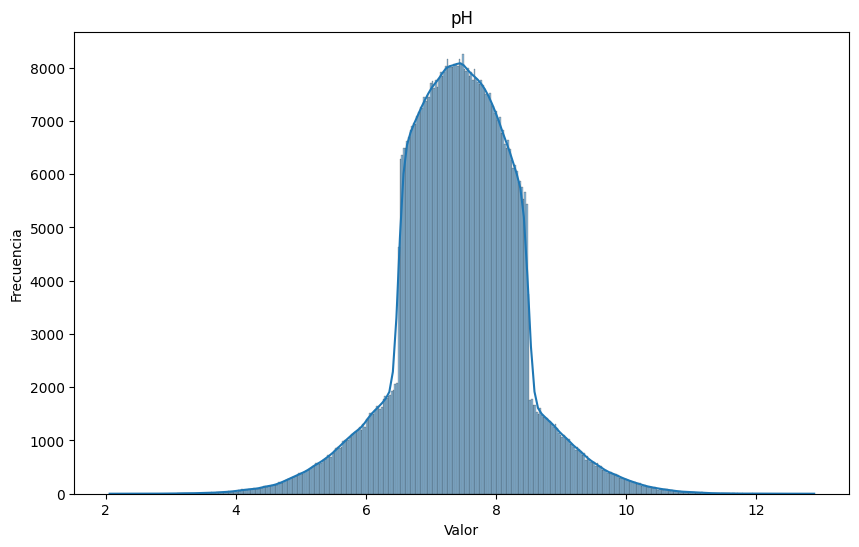

In [117]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [118]:
df['pH'].describe()

,pH
count,685137.000000
mean,7.442448
std,0.911493
min,2.058008
25%,6.880107
50%,7.447080
75%,8.023730
max,12.891960


In [119]:
#Eliminar outliers de la fila pH
col = 'pH'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
# Eliminamos las filas que contienen valores en la columna pH que están fuera del rango definido
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()

,pH
count,667067.000000
mean,7.449839
std,0.803099
min,5.164678
25%,6.899036
50%,7.450028
75%,8.010550
max,9.739132


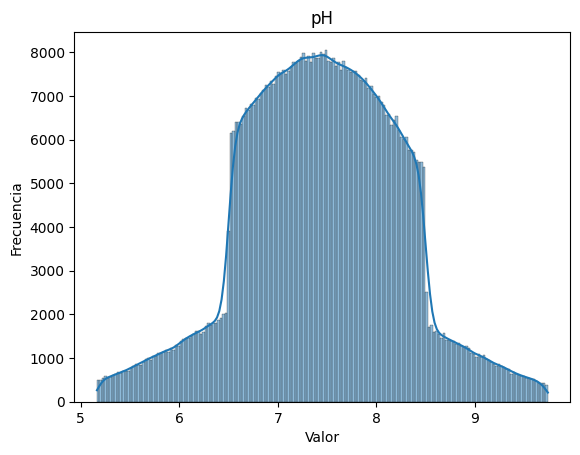

In [120]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show() # ¿no es mejor usar z score?

<p>Análisis de pH 📝 Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 29,870 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.45 a 7.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.85 a 0.73, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.06 a 5.36 y el máximo de 12.89 a 9.57, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable</p>

In [121]:
df.isna().sum()

,0
Índice,0
pH,0
Plata,4463
Nitrato,11923
Cloruros,19596
Plomo,2973
Zinc,17623
Color,627
Turbidez,5573
Fluoruro,21014


<b style="font-size:22px">Análisis de la columna: Plata </b>

In [122]:
df['Plata'].describe()

,Plata
count,6.626040e+05
mean,1.320244e-01
std,4.859343e-01
min,8.010000e-45
25%,1.010000e-05
50%,2.325443e-03
75%,5.635290e-02
max,1.574860e+01


In [123]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    5.562300e+05
mean     1.553449e-02
std      3.011400e-02
min      8.010000e-45
25%      2.530000e-06
50%      5.901445e-04
75%      1.409545e-02
max      1.408669e-01
Name: Plata, dtype: float64


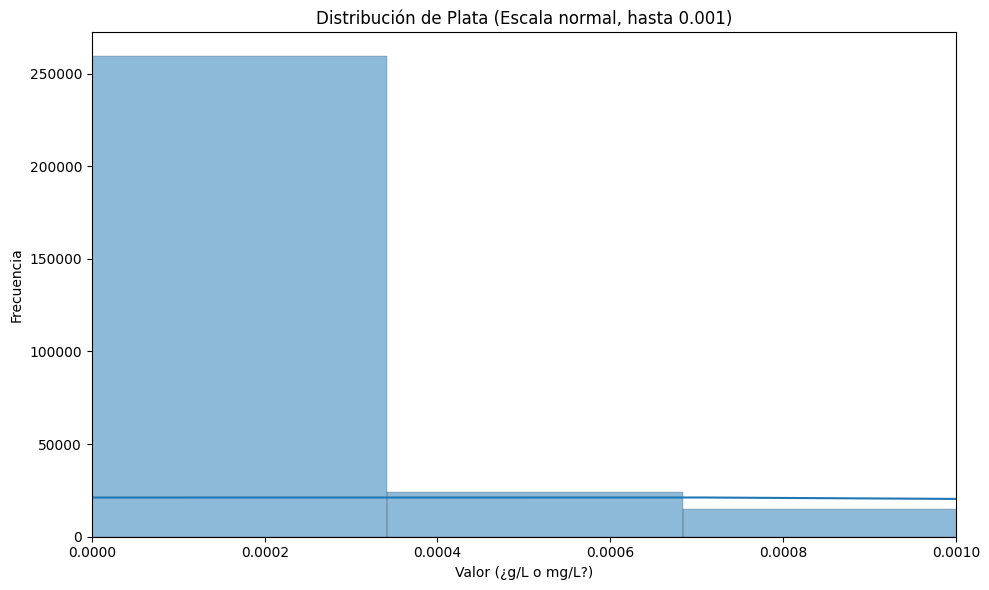

In [124]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

<b style="font-size:22px">Análisis de la columna: Nitrato </b>

In [125]:
df['Nitrato'].describe()

,Nitrato
count,546223.000000
mean,6.136038
std,3.215009
min,0.286173
25%,3.966220
50%,5.595346
75%,7.636367
max,73.072931


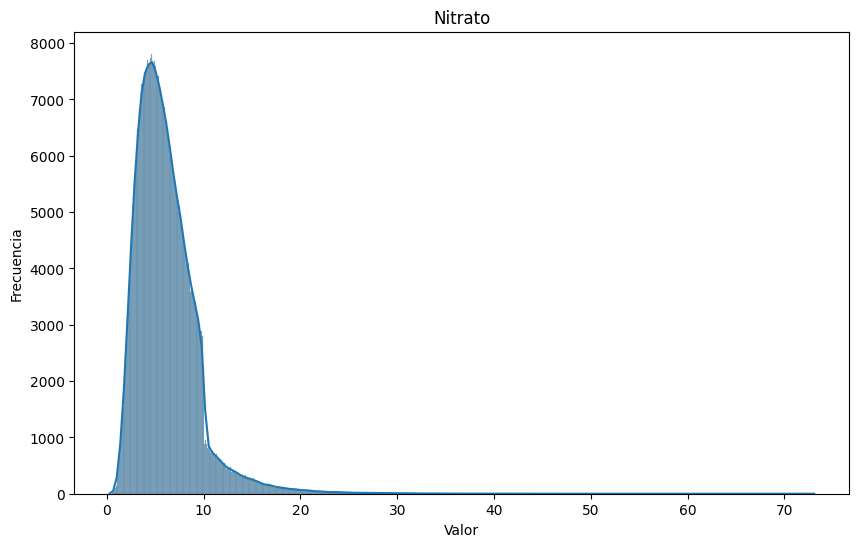

In [126]:
# Observamos la distribuición de la columna Nitrato:

plt.figure(figsize=(10, 6))
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [127]:
df['Nitrato'].describe()

,Nitrato
count,546223.000000
mean,6.136038
std,3.215009
min,0.286173
25%,3.966220
50%,5.595346
75%,7.636367
max,73.072931


In [128]:
#Eliminar outliers de la columna Nitrato

col2 = 'Nitrato'  # ejemplo
Q1 = df[col2].quantile(0.25)
Q3 = df[col2].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col2] >= Q1 - 1.5 * IQR) & (df[col2] <= Q3 + 1.5 * IQR)]
df['Nitrato'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Nitrato'].describe()

,Nitrato
count,528853.000000
mean,5.767487
std,2.383792
min,0.286173
25%,3.913698
50%,5.485218
75%,7.403927
max,13.141506


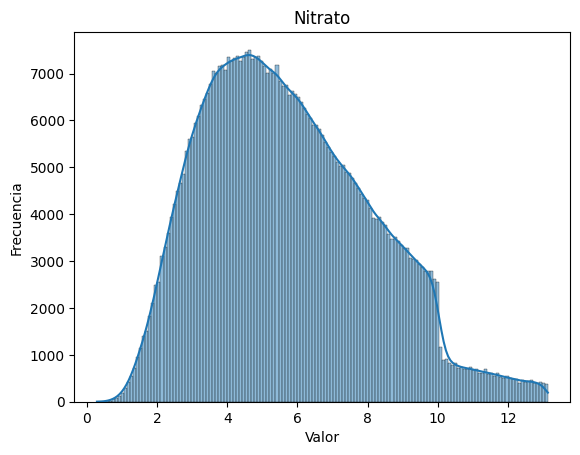

In [129]:
plt.figure()
sns.histplot(df['Nitrato'], kde=True)
plt.title('Nitrato')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Nitrato 📝 Después de eliminar los valores nulos y los outliers, se eliminaron aproximadamente 17,370 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 6.13 a 5.76, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 3.21 a 2.28, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 73.07 a 13.14, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 45 mg/l, hay que evaluar que unidad maneja el dataset para coincidir con el promedio aprox.</p>

<b style="font-size:22px">Análisis de la columna: Cloruros</b>

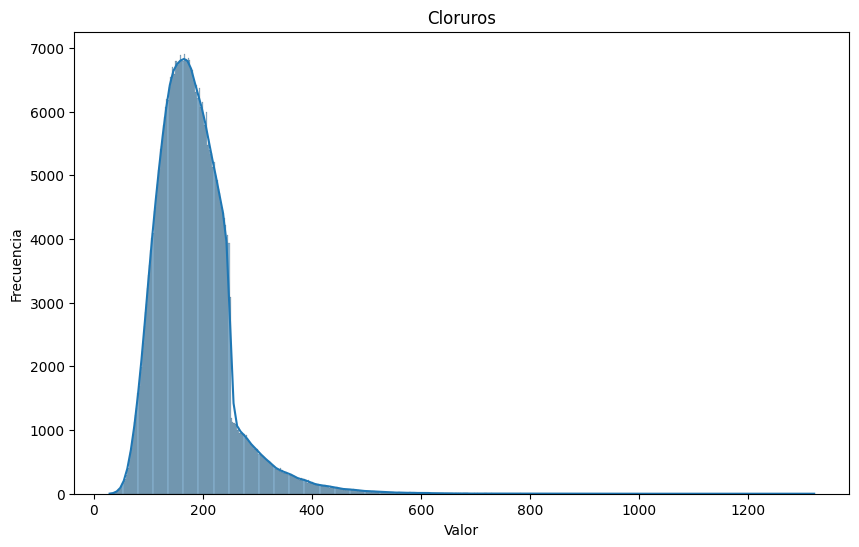

In [130]:
# Observamos la distribuición de la columna Cloruros:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [131]:
df['Cloruros'].describe()

,Cloruros
count,513336.000000
mean,182.680492
std,66.684631
min,29.413497
25%,137.754491
50%,175.145528
75%,216.356432
max,1321.276280


In [132]:
#Eliminar outliers de la fila Cloruros

col3 = 'Cloruros'  # ejemplo
Q1 = df[col3].quantile(0.25)
Q3 = df[col3].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col3] >= Q1 - 1.5 * IQR) & (df[col3] <= Q3 + 1.5 * IQR)]
df['Cloruros'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Cloruros'].describe()

,Cloruros
count,497619.000000
mean,175.570696
std,52.556628
min,29.413497
25%,136.522537
50%,172.881639
75%,212.068579
max,334.247076


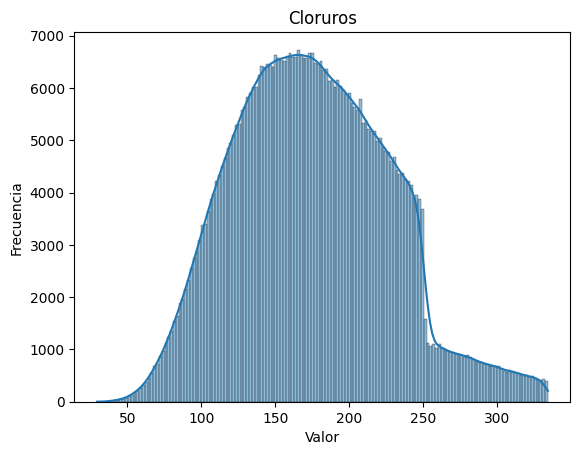

In [133]:
plt.figure()
sns.histplot(df['Cloruros'], kde=True)
plt.title('Cloruros')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Cloruros 📝 Después de eliminar los valores nulos y los outliers, se eliminaron 15,717 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 182.68 a 175.57, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 66.58 a 52.55, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 1321 a 334, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 200 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b style="font-size:22px">Análisis de la columna: Zinc</b>

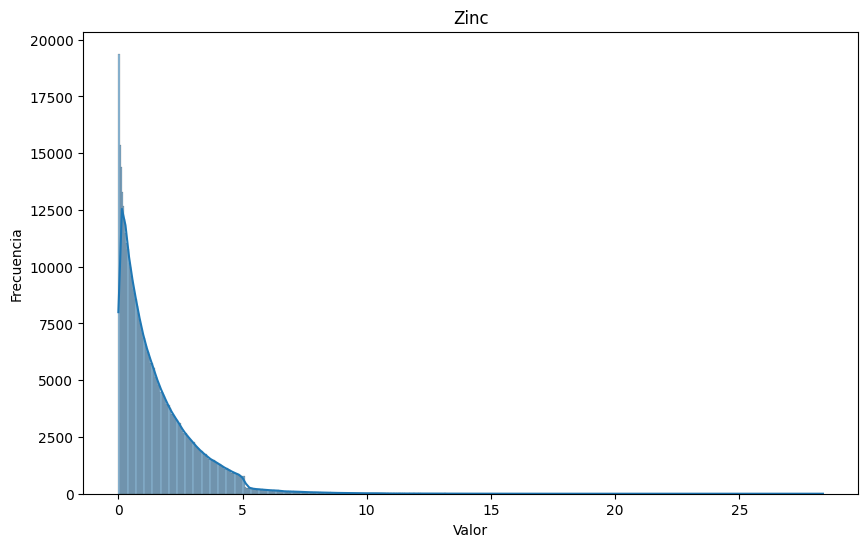

In [134]:
# Observamos la distribuición de la columna Zinc:
plt.figure(figsize=(10, 6))
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [135]:
df['Zinc'].describe()

,Zinc
count,484563.000000
mean,1.531481
std,1.505043
min,0.000001
25%,0.415094
50%,1.078573
75%,2.217501
max,28.368672


In [136]:
#Eliminar outliers de la fila Zinc

col5 = 'Zinc'  # ejemplo
Q1 = df[col5].quantile(0.25)
Q3 = df[col5].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col5] >= Q1 - 2.5 * IQR) & (df[col5] <= Q3 + 2.5 * IQR)]
df['Zinc'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Zinc'].describe()

,Zinc
count,479969.000000
mean,1.463140
std,1.325814
min,0.000001
25%,0.409845
50%,1.062825
75%,2.172168
max,6.722317


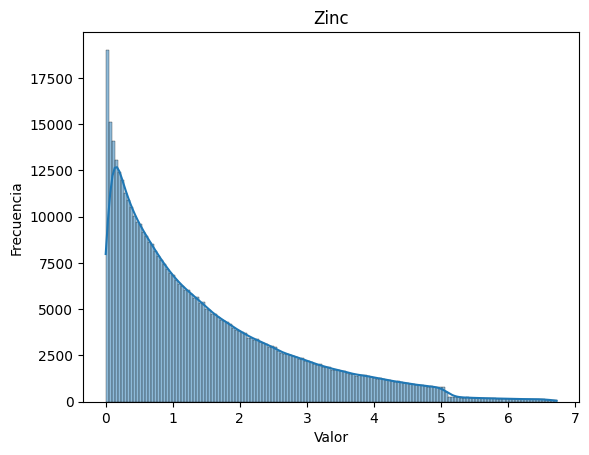

In [137]:
#Volvemos a graficar
plt.figure()
sns.histplot(df['Zinc'], kde=True)
plt.title('Zinc')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Análisis de Zinc 📝 Después de eliminar los valores nulos y los outliers, se eliminaron solo 4,594 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, pasó de 1.53 a 1.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por arriba del promedio general. La desviación estándar también se redujo de 1.50 a 1.42, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo no cambió y el máximo paso de 28.36 a 6.72, lo que confirma que se eliminaron los valores más extremos en el extremo superior del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable

El limite del código alimentario argentino para nitratos es de 5 mg/l, se considera que utiliza esta unidad ya que tiene coherencia.</p>

<b style='font-size:22px'> Análisis de la columna: Plomo </b>

In [138]:
df['Plomo'].describe()

,Plomo
count,4.777910e+05
mean,1.292366e-03
std,3.047505e-02
min,0.000000e+00
25%,9.495000e-123
50%,1.340000e-62
75%,2.920000e-27
max,3.251502e+00


<p>La variable "Plomo" contiene principalmente números muy pequeños, con un promedio de 0.0013 y una desviación estándar de 0.0305. Dado que los valores son tan bajos, aplicamos una transformación logarítmica para comprimir los valores y mejorar la distribución, facilitando su análisis y modelado posterior.</p>

In [139]:
df['Plomo'] = df['Plomo'] + 1e-10  # evitar log(0)

# Aplicar el logaritmo natural
df['Plomo'] = np.log(df['Plomo'])

In [140]:
# Eliminamos outliers:

col_p = 'Plomo'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
#Analizo si quedó algún valor nulo:
df['Plomo'].isna().sum()
print(df[col_p].describe())

count    3.652780e+05
mean    -2.302585e+01
std      1.224906e-10
min     -2.302585e+01
25%     -2.302585e+01
50%     -2.302585e+01
75%     -2.302585e+01
max     -2.302585e+01
Name: Plomo, dtype: float64


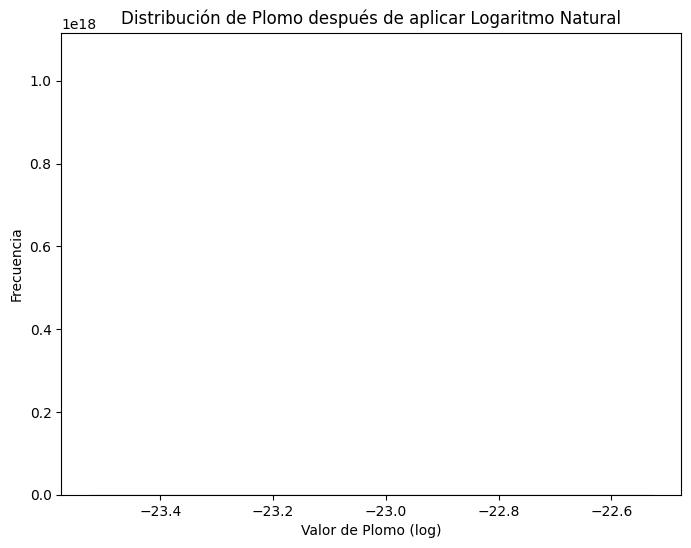

In [141]:
# Visualización con histograma:
plt.figure(figsize=(8, 6))
sns.histplot(df['Plomo'], kde=True, bins=50)
plt.title('Distribución de Plomo después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Plomo (log)')
plt.ylabel('Frecuencia')
plt.show()

<p>La transformación logarítmica expandió la escala de los valores pequeños, mostrando la alta concentración de valores de "Plomo" cercanos a cero en un pico negativo. A pesar de esto, la distribución sigue siendo significativamente no normal, con la mayoría de los datos agrupados en valores muy bajos.
</p>

<b style='font-size:22px'> Análisis de la columna: Manganeso </b>

In [142]:
df['Manganeso'].describe()

,Manganeso
count,3.585660e+05
mean,9.068824e-02
std,4.338723e-01
min,1.380000e-46
25%,1.990000e-06
50%,5.167845e-04
75%,1.298552e-02
max,1.526468e+01


<p> La variable "Manganeso" tiene un promedio de 0.091, con una gran variabilidad (desviación estándar de 0.432). La mayoría de los valores son muy pequeños, con un mínimo de 1.38e-46, pero hay algunos valores altos, como 15.26, lo que sugiere la presencia de valores extremos.
<br>
Aplicaré el logaritmo natural para reducir la variabilidad y hacer la distribución más estable, facilitando el análisis.
</p>

In [143]:
df['Manganeso'] = df['Manganeso'] + 1e-10  # evitar log(0)
# Aplicar el logaritmo natural
df['Manganeso'] = np.log(df['Manganeso'])

In [144]:
# Eliminamos los Outliers:
col_p = 'Manganeso'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    358566.000000
mean         -9.264822
std           6.458520
min         -23.025851
25%         -13.127326
50%          -7.567884
75%          -4.343920
max           2.725541
Name: Manganeso, dtype: float64


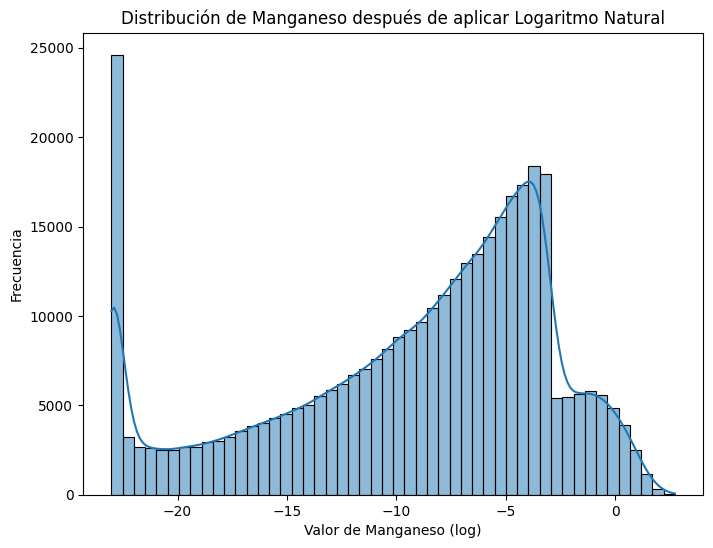

In [145]:
# Visualización con histograma
plt.figure(figsize=(8, 6))
sns.histplot(df['Manganeso'], kde=True, bins=50)
plt.title('Distribución de Manganeso después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Manganeso (log)')
plt.ylabel('Frecuencia')
plt.show()

<p> El Manganeso original tenía muchos valores muy pequeños. Después del logaritmo, la distribución ahora tiene dos picos: uno para los valores originales casi cero y otro para valores un poco más grandes. No se volvió normal, sino que muestra dos grupos distintos. Hay una gran cantidad de muestras con niveles de Manganeso casi indetectables, y otro grupo (más pequeño) con niveles de Manganeso que son significativamente mayores que cero </p>

<b style='font-size:22px'> Análisis de la columna: Turbidez </b>

In [146]:
df['Turbidez'].describe()

,Turbidez
count,3.555600e+05
mean,4.770435e-01
std,8.542950e-01
min,9.180000e-14
25%,3.663792e-02
50%,1.982096e-01
75%,5.876508e-01
max,1.877892e+01


<p>La variable Turbidez muestra una distribución sesgada, con valores mayoritariamente bajos y algunos extremos altos (mínimo: 9.18e-14, máximo: 19.29). Se aplica una transformación logarítmica para reducir la asimetría, facilitar su análisis y representar mejor su comportamiento en el modelo.:</p>

In [147]:
df['Turbidez'] = df['Turbidez'] + 1e-10  # evitar log(0)
# Aplicamos el logaritmo natural
df['Turbidez'] = np.log(df['Turbidez'])

In [148]:
#Eliminamos los Outliers:
col_p = 'Turbidez'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    340344.000000
mean         -1.900274
std           1.898886
min          -7.469195
25%          -3.014385
50%          -1.512249
75%          -0.490195
max           2.932735
Name: Turbidez, dtype: float64


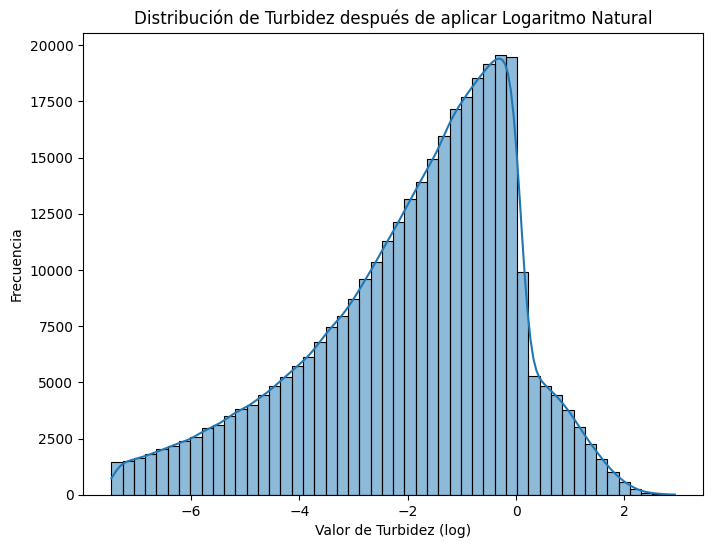

In [149]:
# Visualización con histograma y KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['Turbidez'], kde=True, bins=50)
plt.title('Distribución de Turbidez después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Turbidez (log)')
plt.ylabel('Frecuencia')
plt.show()

<p>La transformación logarítmica de la columna 'Turbidez' ha comprimido el rango de valores y reducido la fuerte asimetría positiva original, concentrando la mayoría de las observaciones en valores logarítmicos bajos. Sin embargo, la distribución sigue mostrando una alta frecuencia en valores transformados cercanos a cero, indicando que la mayoría de las lecturas originales de turbidez eran muy bajas, con una cola que se extiende hacia valores logarítmicos más altos correspondientes a los picos de turbidez.</p>

<b style='font-size:22px'> Análisis de la columna: Cobre </b>

In [150]:
df['Cobre'].describe()

,Cobre
count,3.289890e+05
mean,4.890678e-01
std,5.571855e-01
min,2.360000e-07
25%,1.254059e-01
50%,3.374519e-01
75%,6.750670e-01
max,8.923312e+00


<p>La variable Cobre muestra una distribución sesgada, con valores mayoritariamente bajos y algunos extremos altos (mínimo: 5.41e-08, máximo: 11.39). Se aplica una transformación logarítmica para reducir la asimetría, facilitar su análisis y representar mejor su comportamiento en el modelo.</p>

In [151]:
df['Cobre'] = df['Cobre'] + 1e-10  # evitar log(0)

# Aplicamos el logaritmo natural
df['Cobre'] = np.log(df['Cobre'])
print(df['Cobre'].describe())

count    328989.000000
mean         -1.393918
std           1.451944
min         -15.259010
25%          -2.076199
50%          -1.086332
75%          -0.392943
max           2.188667
Name: Cobre, dtype: float64


In [152]:
#Eliminamos los Outliers:
col_p = 'Cobre'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    317407.000000
mean         -1.230799
std           1.170649
min          -4.601082
25%          -1.940303
50%          -1.032456
75%          -0.370127
max           2.129079
Name: Cobre, dtype: float64


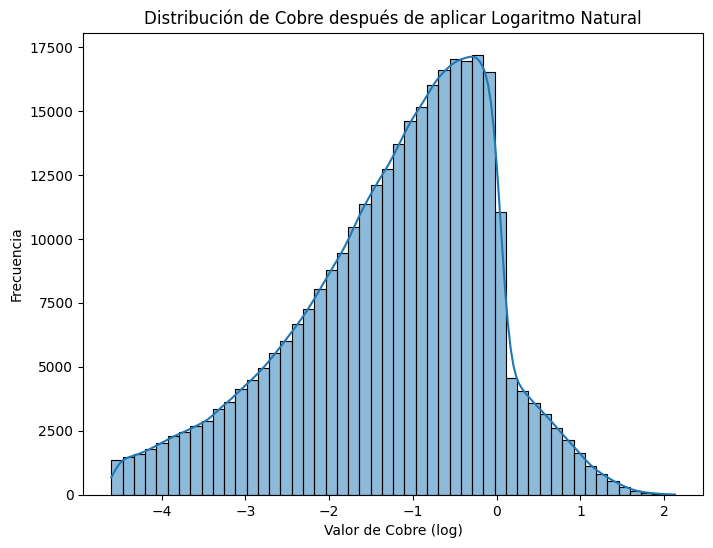

In [153]:
# Visualización con histograma
plt.figure(figsize=(8, 6))
sns.histplot(df['Cobre'], kde=True, bins=50)
plt.title('Distribución de Cobre después de aplicar Logaritmo Natural')
plt.xlabel('Valor de Cobre (log)')
plt.ylabel('Frecuencia')
plt.show()

<p>El gráfico resultante muestra cómo la transformación logarítmica mejora la simetría de la distribución de los datos de Cobre, acercándola a una distribuición más normal. </p>

<b style="font-size:22px">Análisis de columnas: Fluoruro, Olor, Sulfatos:</b>

In [154]:
columnas = ['Fluoruro','Olor','Sulfatos']

In [155]:
df[columnas].describe()

,Fluoruro,Olor,Sulfatos
count,307327.000000,307899.000000,306991.000000
mean,0.937256,1.765897,144.142082
std,0.786100,1.048756,66.352853
min,0.000049,0.011006,15.982276
25%,0.370155,0.873292,97.277333
50%,0.764305,1.735986,133.516515
75%,1.314680,2.602491,179.868608
max,10.288301,4.141904,1393.433430


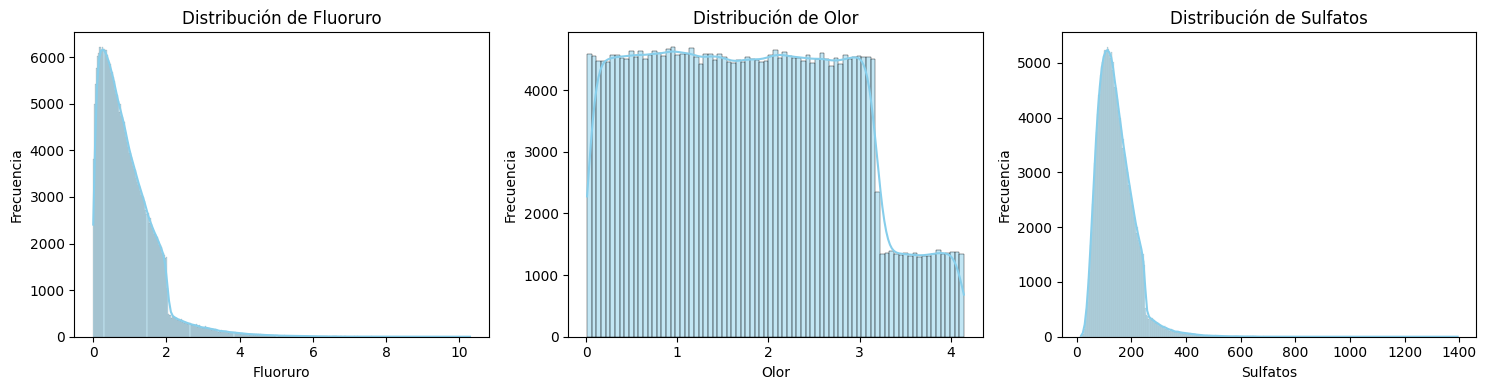

In [156]:
# Grafico las columnas:'Fluoruro','Olor','Sulfatos':
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [157]:
# Aplicamos IQR a las columnas a análizar:
cols = ['Fluoruro','Olor','Sulfatos']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    df[cols].describe()

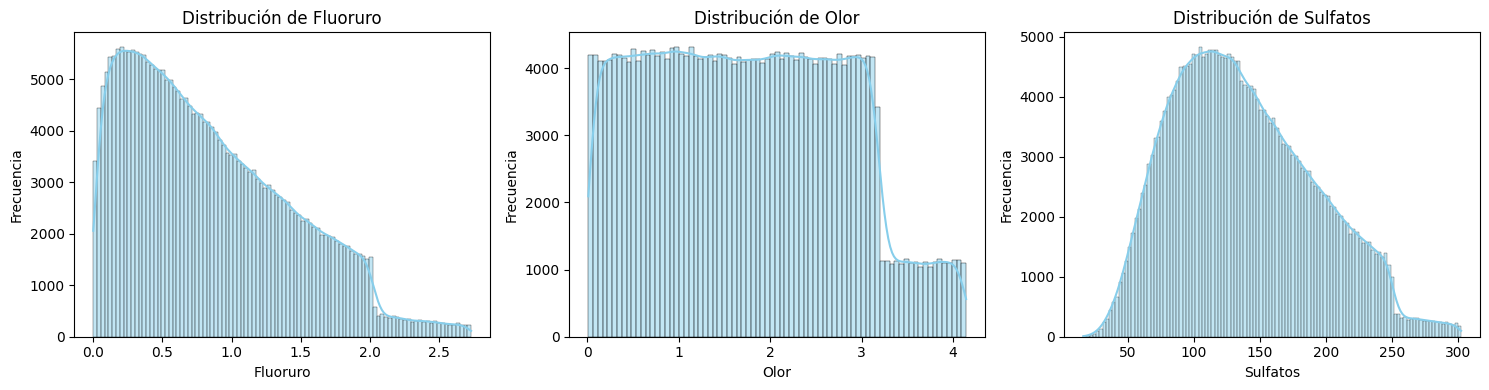

In [158]:
# Grafico de las columnas:'Fluoruro','Olor','Sulfatos':
fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [159]:
df.isna().sum()

,0
Índice,0
pH,0
Plata,0
Nitrato,0
Cloruros,0
Plomo,0
Zinc,0
Color,261
Turbidez,0
Fluoruro,0


<b style="font-size:22px">Análisis de columnas: Conductividad, Cloro residual libre, Sólidos disueltos totales:</b>

In [160]:
columnas2 = ['Conductividad','Cloro residual libre','Sólidos disueltos totales']

In [161]:
df[columnas2].describe()

,Conductividad,Cloro residual libre,Sólidos disueltos totales
count,265902.000000,270716.000000,273345.000000
mean,424.627834,3.223443,263.534201
std,189.628534,0.700844,152.924710
min,13.054824,0.999411,0.010965
25%,286.220910,2.733265,131.953644
50%,396.985426,3.191123,262.724821
75%,533.096948,3.671227,392.357286
max,1708.196692,10.351240,579.797750


In [162]:
#IQR
cols2 = ['Conductividad', 'Cloro residual libre', 'Sólidos disueltos totales']
for col in cols2:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

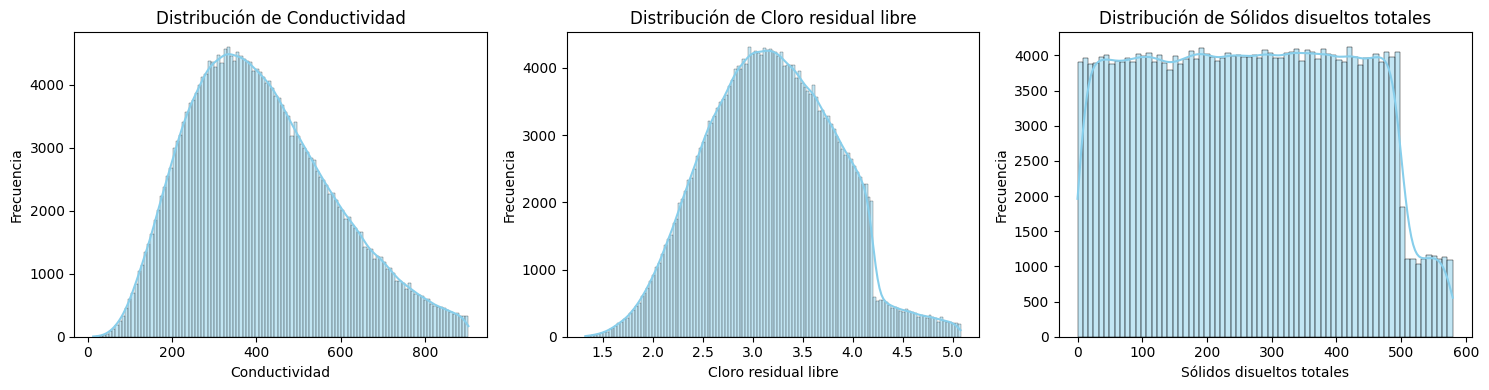

In [163]:
#Gráficamos las columnas: 'Conductividad','Cloro residual libre','Sólidos disueltos totales'
fig, axes = plt.subplots(1, len(columnas2), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas2):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<b style="font-size:22px">Análisis de columna: Temperatura del agua</b>

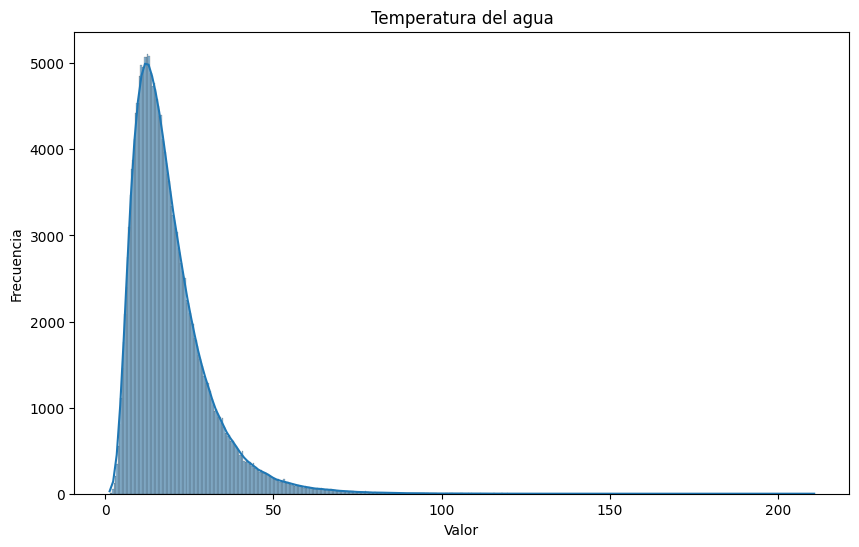

In [164]:
# Observamos la distribuición de la columna Temp. del Agua:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperatura del agua'], kde=True)
plt.title('Temperatura del agua')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [165]:
df['Temperatura del agua'].describe()

,Temperatura del agua
count,247257.000000
mean,19.126895
std,11.377048
min,1.274254
25%,11.333743
50%,16.438346
75%,23.821705
max,210.821909


In [166]:
#Eliminamos los Outliers:

col9 = 'Temperatura del agua'  # ejemplo
Q1 = df[col9].quantile(0.25)
Q3 = df[col9].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col9] >= Q1 - 1.5 * IQR) & (df[col9] <= Q3 + 1.5 * IQR)]
df['Temperatura del agua'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Temperatura del agua'].describe()

,Temperatura del agua
count,236843.000000
mean,17.576217
std,8.412359
min,1.274254
25%,11.124519
50%,15.965618
75%,22.611062
max,42.553119


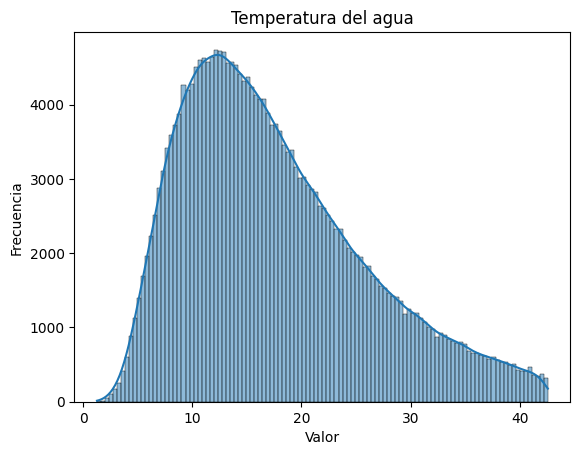

In [167]:
# Volvemos a graficar
plt.figure()
sns.histplot(df['Temperatura del agua'], kde=True)
plt.title('Temperatura del agua')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

<p>Después de eliminar los valores nulos y los outliers, los datos de las temperaturas muestran una reducción en la cantidad de registros, con una disminución tanto en la media como en la desviación estándar. La temperatura del agua experimentó una baja en la media, pasando de 19.13 a 17.58, lo que indica que los valores extremos estaban influyendo en el promedio. También se observó una notable reducción en el valor máximo, que bajó de 210.82 a 42.51, reflejando la eliminación de outliers muy altos.</p>

<b style="font-size:22px">Análisis de columna: Temperatura del aire</b>

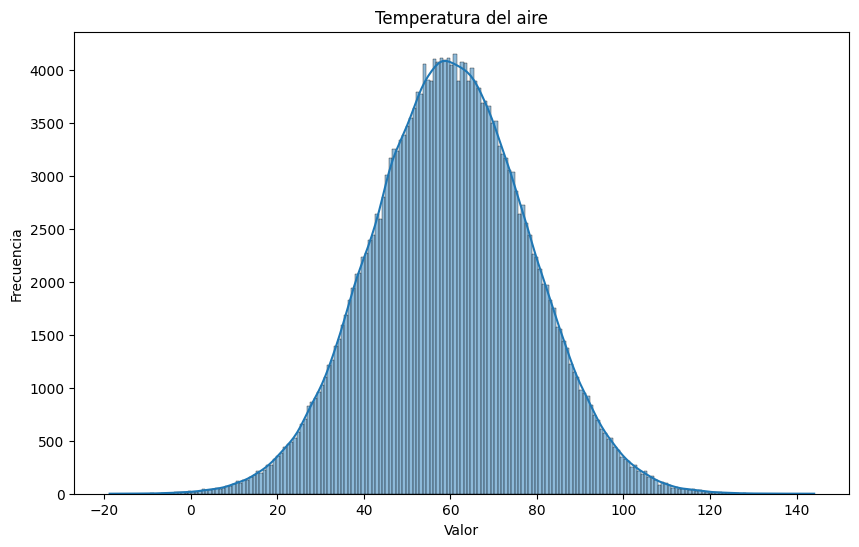

In [168]:
# Observamos la distribuición de la columna Temp. del Aire:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperatura del aire'], kde=True)
plt.title('Temperatura del aire')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [169]:
df['Temperatura del aire'].describe()

,Temperatura del aire
count,235612.000000
mean,60.056348
std,18.044924
min,-18.747927
25%,47.855957
50%,60.005179
75%,72.221352
max,144.078518


In [170]:
#Eliminamos los Outliers:

col10 = 'Temperatura del aire'  # ejemplo
Q1 = df[col10].quantile(0.25)
Q3 = df[col10].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col10] >= Q1 - 1.5 * IQR) & (df[col10] <= Q3 + 1.5 * IQR)]
df['Temperatura del aire'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['Temperatura del aire'].describe()

,Temperatura del aire
count,233921.000000
mean,60.058983
std,17.507198
min,11.308434
25%,47.964075
50%,60.006630
75%,72.124111
max,108.766126


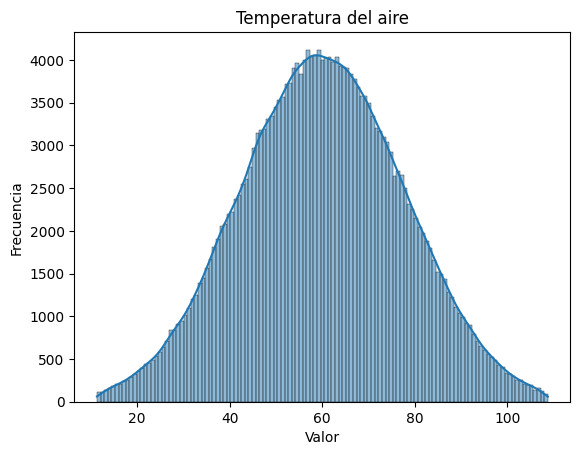

In [171]:
# Volvemos a graficar
plt.figure()
sns.histplot(df['Temperatura del aire'], kde=True)
plt.title('Temperatura del aire')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [172]:
df.isna().sum()

,0
Índice,0
pH,0
Plata,0
Nitrato,0
Cloruros,0
Plomo,0
Zinc,0
Color,221
Turbidez,0
Fluoruro,0


<p>En cuanto a la temperatura del aire, la media prácticamente se mantuvo igual, pero el máximo también disminuyó de 140.88 a 108.70, sugiriendo que los valores extremos fueron eliminados.</p>

<h1>Sección categorica:</h1>

<b style="font-size:22px">Análisis de columna: Meses</b>

In [173]:
print(df['Mes'].unique())
total_meses = df['Mes'].count()
print("Total de registros con Mes válido:", total_meses)

['April' 'March' 'January' 'July' 'September' 'June' 'May' 'October'
 'November' 'August' 'December' 'February' nan]
Total de registros con Mes válido: 230116


In [174]:
# Elimino los valores nulos
df = df[df['Mes'].notna()]
# Ordeno los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

/tmp/ipython-input-175-1691330805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_meses.index, y=conteo_meses.values, palette="viridis")


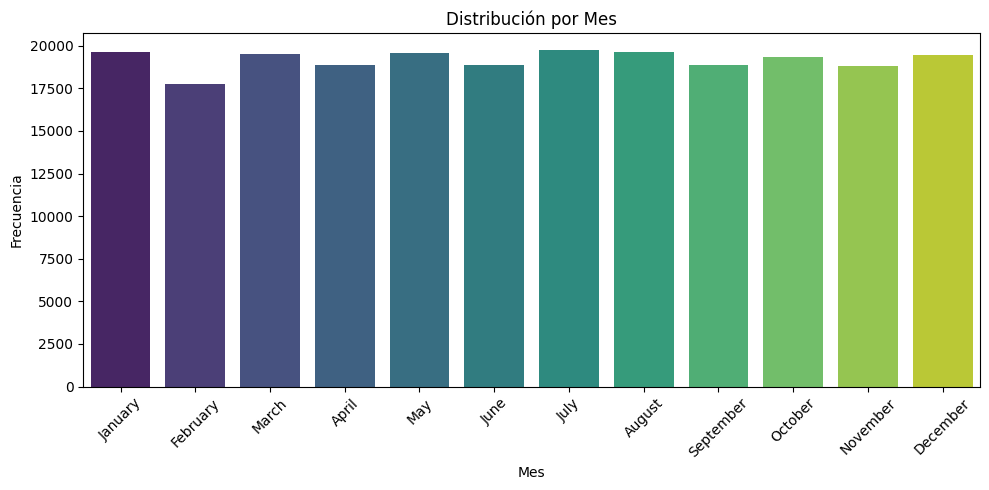

In [175]:
conteo_meses = df['Mes'].value_counts().reindex(orden_meses)
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_meses.index, y=conteo_meses.values, palette="viridis")
plt.title("Distribución por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p>Convertimos las variables categóricas en formato numérico para poder usarlas en modelos. (Encoding) Se aplica Label Encoding con orden cronológico ya que este es útil para conservar el orden de los meses y usarlo en modelos que consideren relaciones ordinales</p>

In [176]:
#Este código toma la columna categórica 'Mes', define un orden específico para los meses y luego crea una nueva columna numérica
#'Mes_encoded' que representa los meses con números basados en ese orden. Esto prepara los datos para su uso en modelos de aprendizaje
# automático que requieren entrada numérica.

df['Mes'] = pd.Categorical(df['Mes'], categories=orden_meses, ordered=True)
df['Mes_encoded'] = df['Mes'].cat.codes

df[['Mes', 'Mes_encoded']].head()

,Mes,Mes_encoded
2,April,3
3,March,2
9,January,0
14,July,6
16,September,8


<b style="font-size:22px">Análisis de columna: Color</b>

<p>La variable Color representa la apariencia visual del agua y puede estar relacionada con la presencia de contaminantes orgánicos o inorgánicos. Dado que estas categorías tienen una progresión lógica (desde "Colorless" hasta "Yellow"), se convierte a una variable categórica ordinal con el siguiente orden:

'Colorless' < 'Near Colorless' < 'Faint Yellow' < 'Light Yellow' < 'Yellow'. Este orden refleja un aumento en la intensidad del color, útil para modelos que aprovechan relaciones ordinales.</p>

In [177]:
print(df['Color'].unique())
total_meses = df['Color'].count()
print("Total de registros con Mes válido:", total_meses)

['Colorless' 'Near Colorless' 'Yellow' 'Light Yellow' 'Faint Yellow' nan]
Total de registros con Mes válido: 229900


In [178]:
# Elimino los valores nulos
df = df[df['Color'].notna()]
# Este orden sigue la escala estándar de color del agua tipo Pt-Co (Platinum-Cobalt), donde un número bajo indica agua más clara.
orden_color = ['Colorless', 'Near Colorless', 'Faint Yellow', 'Light Yellow', 'Yellow']

/tmp/ipython-input-179-3820033657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_color.index, y=conteo_color.values, palette="viridis")


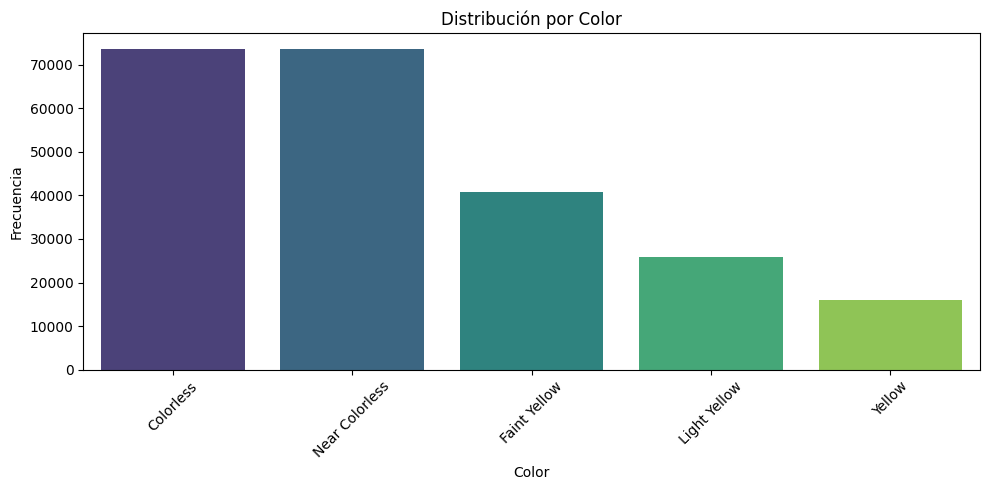

In [179]:
conteo_color = df['Color'].value_counts().reindex(orden_color)
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_color.index, y=conteo_color.values, palette="viridis")
plt.title("Distribución por Color")
plt.xlabel("Color")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p>Convertimos las variables categóricas en formato numérico para poder usarlas en modelos. (Encoding) Se aplica Label Encoding con orden cronológico ya que este es útil para conservar el orden de los meses y usarlo en modelos que consideren relaciones ordinales </p>

In [180]:
# Este código convierte la columna categórica 'Color' en una variable ordinal,
# definiendo un orden lógico basado en la intensidad del color del agua,
# desde 'Colorless' (agua más clara) hasta 'Yellow' (más intensa).
# Luego, se crea una nueva columna 'Color_encoded' con valores numéricos (0 a 4)
# que permiten utilizar esta variable en modelos de aprendizaje automático que requieren datos numéricos.
df['Color'] = pd.Categorical(df['Color'], categories=orden_color, ordered=True)
df['Color_encoded'] = df['Color'].cat.codes

df[['Color', 'Color_encoded']].head()

,Color,Color_encoded
2,Colorless,0
3,Colorless,0
9,Near Colorless,1
14,Colorless,0
16,Yellow,4


<b style="font-size:22px">Análisis de columna: Fuente</b>

In [181]:
print(df['Fuente'].unique())
total_fuentes = df['Fuente'].count()
print("Total de registros con Fuente son:", total_fuentes)

['Reservoir' 'Spring' 'Well' 'Stream' 'Aquifer' nan 'Ground' 'River'
 'Lake']
Total de registros con Fuente son: 226507


In [182]:
# Elimino los valores nulos
df = df[df['Fuente'].notna()]

/tmp/ipython-input-183-3653201019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_fuentes.index, y=conteo_fuentes.values, palette="viridis")


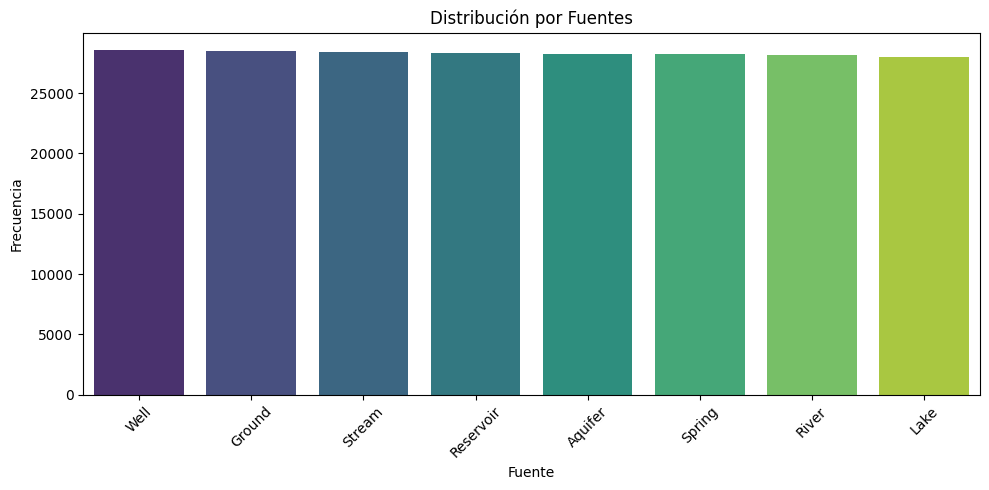

In [183]:
conteo_fuentes = df['Fuente'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=conteo_fuentes.index, y=conteo_fuentes.values, palette="viridis")
plt.title("Distribución por Fuentes")
plt.xlabel("Fuente")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [184]:
# En el gráfico se visualizan casi iguales, confirmo con esto
conteo_fuentes = df['Fuente'].value_counts()
print(conteo_fuentes)
# Hay diferencias entre estos por lo tanto mantengo las Fuentes

Fuente
Well         28568
Ground       28491
Stream       28430
Reservoir    28326
Aquifer      28266
Spring       28234
River        28168
Lake         28024
Name: count, dtype: int64


In [185]:
# La variable 'Fuente' representa la procedencia del agua (ej. río, pozo, lago, etc.).
# Dado que estas categorías no tienen un orden lógico intrínseco, se consideran variables categóricas nominales.
# Para su uso en modelos de machine learning, se recomienda aplicar One-Hot Encoding.
df_fuente_encoded = pd.get_dummies(df['Fuente'], prefix='Fuente')
df = pd.concat([df, df_fuente_encoded], axis=1)

In [186]:
# Veo si estan todas las columnas
print(df.columns[df.columns.str.startswith('Fuente_')])

Index(['Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake', 'Fuente_Reservoir',
       'Fuente_River', 'Fuente_Spring', 'Fuente_Stream', 'Fuente_Well'],
      dtype='object')


In [187]:
# Verifico que el encoding esté bien hecho : Coincide con el valor original de Fuente.
df[['Fuente', 'Fuente_Reservoir', 'Fuente_Spring', 'Fuente_River', 'Fuente_Stream',
    'Fuente_Aquifer', 'Fuente_Lake', 'Fuente_Ground', 'Fuente_Well']].head(10)

,Fuente,Fuente_Reservoir,Fuente_Spring,Fuente_River,Fuente_Stream,Fuente_Aquifer,Fuente_Lake,Fuente_Ground,Fuente_Well
2,Reservoir,True,False,False,False,False,False,False,False
3,Spring,False,True,False,False,False,False,False,False
9,Spring,False,True,False,False,False,False,False,False
14,Spring,False,True,False,False,False,False,False,False
16,Well,False,False,False,False,False,False,False,True
17,Stream,False,False,False,True,False,False,False,False
33,Aquifer,False,False,False,False,True,False,False,False
38,Well,False,False,False,False,False,False,False,True
41,Aquifer,False,False,False,False,True,False,False,False
47,Stream,False,False,False,True,False,False,False,False


In [188]:
# Chequeo la suma total : da OK al original
print(df[['Fuente_Reservoir', 'Fuente_Spring', 'Fuente_River', 'Fuente_Stream',
          'Fuente_Aquifer', 'Fuente_Lake', 'Fuente_Ground', 'Fuente_Well']].sum())

Fuente_Reservoir    28326
Fuente_Spring       28234
Fuente_River        28168
Fuente_Stream       28430
Fuente_Aquifer      28266
Fuente_Lake         28024
Fuente_Ground       28491
Fuente_Well         28568
dtype: int64


In [189]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo',
       'Mes_encoded', 'Color_encoded', 'Fuente_Aquifer', 'Fuente_Ground',
       'Fuente_Lake', 'Fuente_Reservoir', 'Fuente_River', 'Fuente_Spring',
       'Fuente_Stream', 'Fuente_Well'],
      dtype='object')

In [190]:
# Elimino las columnas que no son relevantes para el objetivo del modelo: 'Hora del día', 'Día'

In [191]:
df = df.drop(columns=['Día', 'Hora del día'])

In [192]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Objetivo', 'Mes_encoded',
       'Color_encoded', 'Fuente_Aquifer', 'Fuente_Ground', 'Fuente_Lake',
       'Fuente_Reservoir', 'Fuente_River', 'Fuente_Spring', 'Fuente_Stream',
       'Fuente_Well'],
      dtype='object')

In [193]:
df.dtypes

,0
Índice,int64
pH,float64
Plata,float64
Nitrato,float64
Cloruros,float64
Plomo,float64
Zinc,float64
Color,category
Turbidez,float64
Fluoruro,float64


<b style="font-size:22px">Estandarización de columnas solo de variables numéricas:</b>

In [194]:
scaler = StandardScaler()

In [195]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.drop("Objetivo")
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])
print(df[columnas_numericas].describe())

             Índice            pH         Plata       Nitrato      Cloruros  \
count  2.265070e+05  2.265070e+05  2.265070e+05  2.265070e+05  2.265070e+05   
mean  -2.007653e-16  2.160924e-15  4.903064e-17  6.575062e-17  5.292674e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.079757e+00 -3.124245e+00 -5.141855e-01 -2.321288e+00 -2.809357e+00   
25%   -7.545703e-01 -7.053144e-01 -5.141050e-01 -7.801921e-01 -7.425975e-01   
50%    6.584264e-02 -2.754964e-03 -4.947774e-01 -1.120830e-01 -4.372769e-02   
75%    8.686922e-01  7.152766e-01 -5.081244e-02  6.983159e-01  7.032680e-01   
max    1.557192e+00  3.103414e+00  4.173187e+00  3.169421e+00  3.093423e+00   

              Plomo          Zinc      Turbidez      Fluoruro         Cobre  \
count  2.265070e+05  2.265070e+05  2.265070e+05  2.265070e+05  2.265070e+05   
mean   3.552714e-15 -4.868557e-17 -1.460567e-16 -3.638870e-17  4.667792e-17   
std    0.000000e+00  1.000002e+00  1.000002e+00  1.

In [196]:
df['Objetivo'] # La excluímos de la transformación ya que solo tiene dos posibles valores 0 y 1.

,Objetivo
2,1
3,1
9,1
14,1
16,1
...,...
698562,0
698566,0
698567,0
698568,0


<b font-size:26px>🧪 Conclusión Final: <br>
Se aplicó una transformación logarítmica a las variables con notación científica para reducir su sesgo y valores extremos. Posteriormente, se estandarizaron todas las variables numéricas para que tengan una media de 0 y una desviación estándar de 1. Esta estandarización es crucial al utilizar modelos de clasificación, ya que garantiza que todas las características contribuyan de manera equitativa al modelo.</b>

# 📌 Introducción al aprendizaje no supervisado aplicado a calidad del agua

Luego de realizar un análisis basado en aprendizaje supervisado —donde el objetivo fue predecir si una muestra de agua era potable o no—, se propone complementar el estudio aplicando técnicas de aprendizaje no supervisado, específicamente de clustering y reducción de la dimensionalidad.

A diferencia del enfoque anterior, en el aprendizaje no supervisado no se utiliza la etiqueta objetivo (en este caso, la variable Objetivo que indica potabilidad), sino que se intenta descubrir patrones o agrupamientos naturales en los datos sin tener una guía directa.

Dado que nuestro dataset contiene múltiples características físico-químicas del agua, junto con variables contextuales como temperatura, mes de obtención y tipo de fuente, es esperable que ciertas combinaciones de condiciones formen grupos similares entre sí, lo que podría ayudar a:

Identificar grupos de muestras con perfiles químicos similares.

Analizar si las fuentes de agua están asociadas a determinados grupos.

Explorar si la potabilidad puede estar implícita en algunos clusters, incluso sin usar esa etiqueta.

Reducir la complejidad del dataset mediante PCA para visualizar los datos o mejorar el desempeño de futuros modelos.

Por estas razones, se considera pertinente explorar técnicas como:

📌 K-Means: para detectar grupos naturales de muestras.

📌 DBSCAN: para identificar grupos densos y puntos atípicos.

📌 PCA (Análisis de Componentes Principales): para visualizar los datos en menor dimensión y entender qué variables explican la mayor variabilidad.

In [197]:
from sklearn.preprocessing import StandardScaler

# Excluimos columnas no numéricas o que no corresponden al clustering
columnas_excluir = ["Índice", "Objetivo", "Fuente", "Color", "Mes"]
X_unsup = df.drop(columns=columnas_excluir)

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

In [198]:
from sklearn.decomposition import PCA
# Reducimos a 2 dimensiones para poder graficar después

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

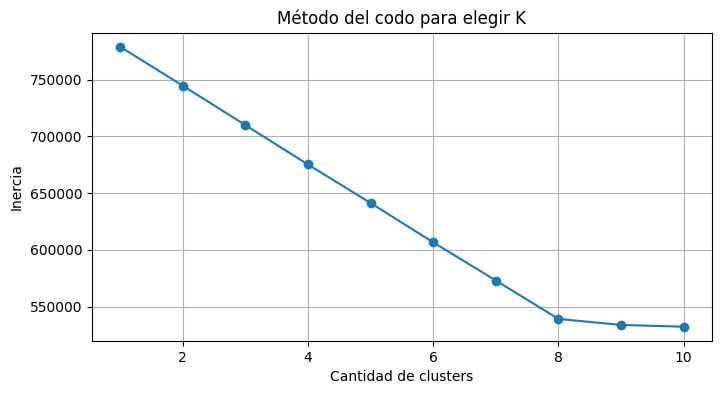

In [199]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Usamos una muestra del dataset para que sea más rápido
from sklearn.utils import resample
X_sample = resample(X_scaled, n_samples=30000, random_state=42)

# Rango de k a probar
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_sample)
    inertia.append(km.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo para elegir K')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


¿Qué es “inercia”?
Es la suma de las distancias de cada punto a su centroide. A menor inercia, mejor compactación. Pero si seguís bajando inercia agregando muchos clusters, perdés interpretabilidad. Por eso se busca un “codo”.

In [200]:
# Ajustamos KMeans con todo el dataset escalado
k_optimo = 8
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)


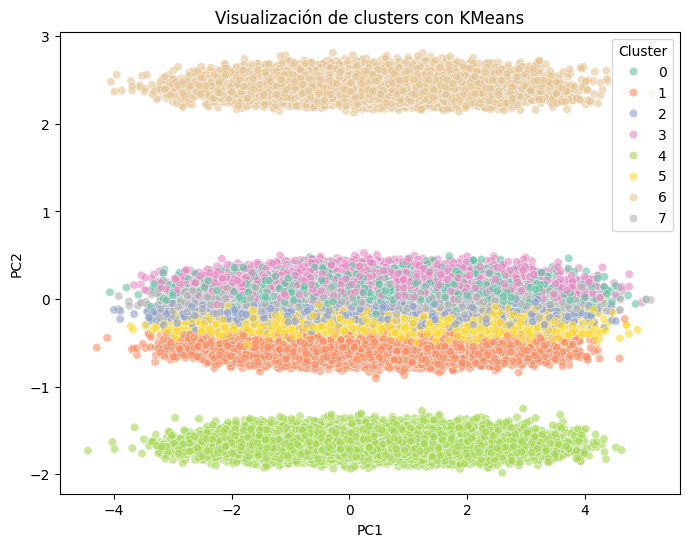

In [201]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_viz = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_viz["Cluster"] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x="PC1", y="PC2", hue="Cluster", palette="Set2", alpha=0.6)
plt.title("Visualización de clusters con KMeans")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


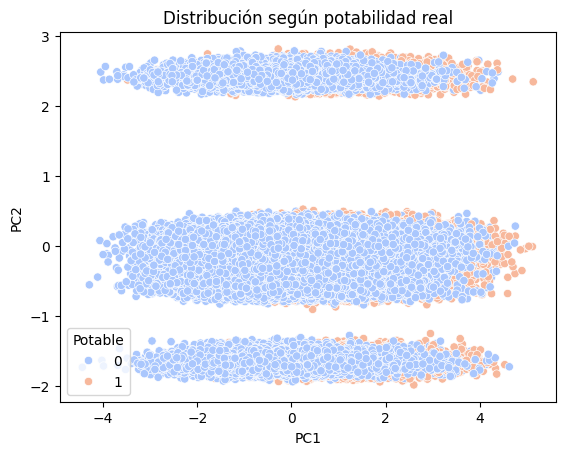

In [202]:
# ver si coincide
df_viz['Potable'] = df['Objetivo'].values

sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Potable', palette='coolwarm')
plt.title("Distribución según potabilidad real")
plt.show()

In [97]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f"🔍 Silhouette Score: {sil_score:.3f}")

🔍 Silhouette Score: 0.193


🟢 > 0.5: clustering claro, bien definido.
🟡 0.2 – 0.5: agrupaciones moderadas, algo solapadas.
🔴 < 0.2: agrupaciones pobres, solapadas o sin forma clara.
El resultado cae cerca del límite inferior de lo aceptable. El modelo está forzando agrupaciones que no representan bien la estructura natural de los datos. Es probable que los clusters se solapen mucho o no capturen patrones útiles.

El modelo K-Means con k=8 generó clusters que no parecen separar con claridad las muestras potables y no potables.
El gráfico de potabilidad real muestra que las potables (naranja) están bastante mezcladas dentro del "mar azul" de no potables.
Entonces K-Means encontró agrupaciones matemáticamente válidas, pero no coinciden bien con el objetivo real (potabilidad).

A qué se debe?

Puede que la calidad del agua sea un fenómeno complejo con umbrales, y no

*   Puede que la calidad del agua sea un fenómeno complejo con umbrales, y no lineal

*   Desbalance de clases: Hay muchas más muestras no potables, entonces los clusters tienden a representar eso



### Probar KMeans sobre los datos PCA (X_pca)
Se puede aplicar KMeans directamente sobre las 2 o 3 componentes principales para ver si mejora el agrupamiento, ya que así se está trabajando con los patrones más fuertes.
Al reducir la dimensionalidad con PCA, eliminamos ruido y redundancia de los datos. Luego, aplicamos K-Means sobre esas componentes más "resumidas" que capturan la mayor varianza (estructura) de los datos.

In [203]:
pca = PCA(n_components=2, random_state=42) #Reducimos a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

In [204]:
#Aplicamos K-Means sobre las componentes PCA
k = 3  # o el número que te haya parecido más apropiado
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_pca = kmeans_pca.fit_predict(X_pca)


In [205]:
score_pca = silhouette_score(X_pca, labels_pca)
print(f"🔍 Silhouette Score usando PCA + KMeans: {score_pca:.3f}")

🔍 Silhouette Score usando PCA + KMeans: 0.456


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


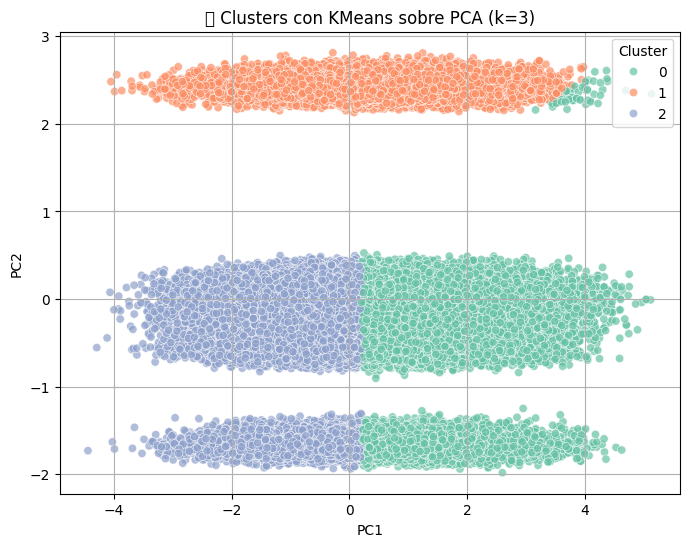

In [206]:
#Graficamos los clusters en espacio PCA
df_pca_clusters = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_clusters["Cluster"] = labels_pca
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_clusters, x="PC1", y="PC2", hue="Cluster", palette="Set2", alpha=0.7)
plt.title(f"🎯 Clusters con KMeans sobre PCA (k={k})")
plt.grid(True)
plt.show()

El uso de PCA previo al clustering con K-Means mejora significativamente el rendimiento y la interpretabilidad del modelo. Esto se debe a que PCA concentra la variabilidad más importante del dataset en pocas dimensiones, facilitando la tarea de agrupamiento.

# Gaussian Mixture Models (GMM)

El modelo Gaussian Mixture Models (GMM) asume que los datos provienen de una mezcla de varias distribuciones normales (gaussianas). A diferencia de K-Means, que asigna cada punto al centro más cercano, GMM estima la probabilidad de que un punto pertenezca a cada cluster, lo que permite una clasificación más suave y probabilística.

In [207]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reutilizamos X_scaled (sin nulos y ya escalado)

# Aplicamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


In [208]:
# Ajustamos el modelo con 2 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Asignar a cada punto el cluster con mayor probabilidad
labels_gmm = gmm.predict(X_scaled)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


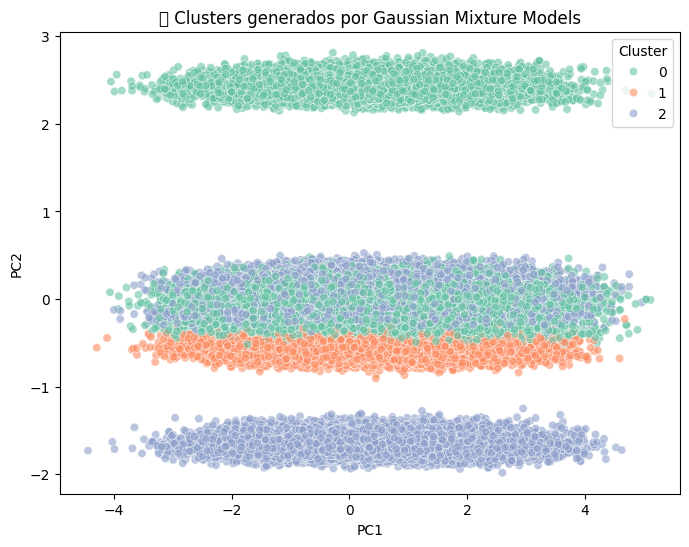

In [209]:
# Convertimos a DataFrame para graficar
df_gmm = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_gmm['Cluster'] = labels_gmm

# Plot con seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_gmm, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.6)
plt.title("📌 Clusters generados por Gaussian Mixture Models")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


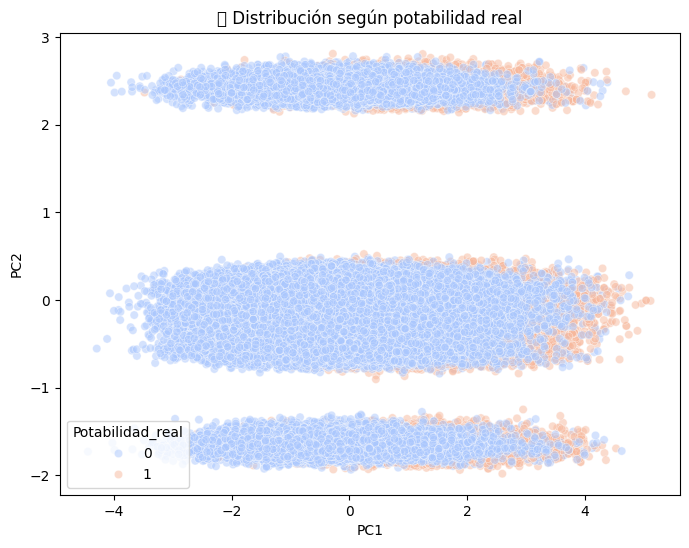

In [210]:
df_gmm['Potabilidad_real'] = df['Objetivo'].values

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_gmm, x='PC1', y='PC2', hue='Potabilidad_real', palette='coolwarm', alpha=0.5)
plt.title("🔍 Distribución según potabilidad real")
plt.show()

In [211]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
print("🔍 Silhouette Score con GMM:", round(silhouette_gmm, 3))

🔍 Silhouette Score con GMM: 0.073


##  Conclusión del Clustering No Supervisado

Probamos distintos algoritmos de clustering para explorar patrones ocultos en los parámetros físico-químicos del agua. El mejor rendimiento lo obtuvimos con K-Means + PCA, alcanzando un Silhouette Score de 0.456, lo que indica una buena separación entre grupos.

En cambio, el modelo de Gaussian Mixture Models (GMM) obtuvo un Silhouette Score muy bajo (0.073), lo que sugiere que los clusters no están bien definidos en este caso.

Aunque el clustering no supervisado no utiliza la variable "potabilidad", K-Means logró formar agrupamientos que visualmente se acercan a la separación entre agua potable y no potable, lo cual valida su utilidad como método exploratorio.



### Gráfico de Clusters con PCA (para KMeans y GMM)
Esto permite mostrar cómo se agruparon los datos en 2D tras aplicar reducción de dimensionalidad (PCA).

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


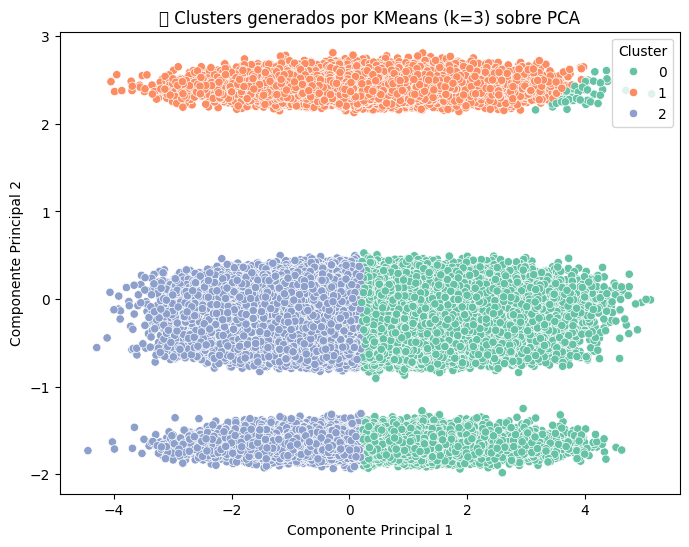

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# KMeans clustering sobre PCA
df_kmeans_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_kmeans_pca['Cluster'] = labels_pca  # <- labels obtenidos de KMeans

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("🔵 Clusters generados por KMeans (k=3) sobre PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


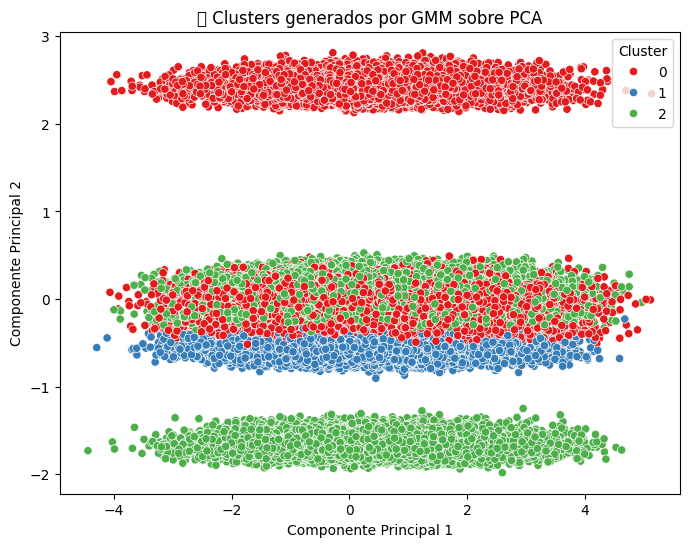

In [213]:
# GMM clustering sobre PCA
df_gmm_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_gmm_pca['Cluster'] = gmm_labels  # <- labels del modelo GMM

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_gmm_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title("🔴 Clusters generados por GMM sobre PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


🔍 Conclusión final sobre los modelos de clustering aplicados

Al comparar K-Means y Gaussian Mixture Models (GMM) sobre datos reducidos con PCA, se observa una clara diferencia en desempeño:

K-Means con PCA logró una mejor separación de los grupos, con un Silhouette Score de 0.456, indicando que los datos están bien agrupados y que los clusters son coherentes internamente.

En cambio, GMM con PCA presentó una mayor superposición entre los grupos, con un Silhouette Score bajo (0.073), lo que sugiere que la asignación de puntos a clusters fue menos efectiva y más ambigua.

🔎 Conclusión general:
K-Means + PCA fue el método más eficiente para este dataset, tanto en la visualización como en el desempeño numérico. Esto lo convierte en una mejor opción para explorar patrones no supervisados en la potabilidad del agua.

/tmp/ipython-input-214-708034142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_scores, x='Modelo', y='Silhouette Score', palette='pastel')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


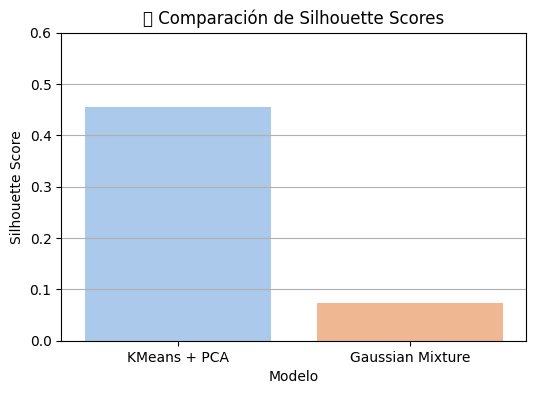

In [214]:
scores = {
    'KMeans + PCA': 0.456,
    'Gaussian Mixture': 0.073
}

# DataFrame para graficar
df_scores = pd.DataFrame(list(scores.items()), columns=['Modelo', 'Silhouette Score'])

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=df_scores, x='Modelo', y='Silhouette Score', palette='pastel')
plt.title("📊 Comparación de Silhouette Scores")
plt.ylim(0, 0.6)
plt.grid(axis='y')
plt.show()
